In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC


In [61]:
df=pd.read_csv("WineQT.csv")

In [62]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [63]:
df.shape

(1143, 13)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [65]:
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [66]:
# DROP UNWANTED COLUMNS
df.drop(['Id'],inplace=True,axis=1)

In [67]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [68]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Exploratory Data Analysis

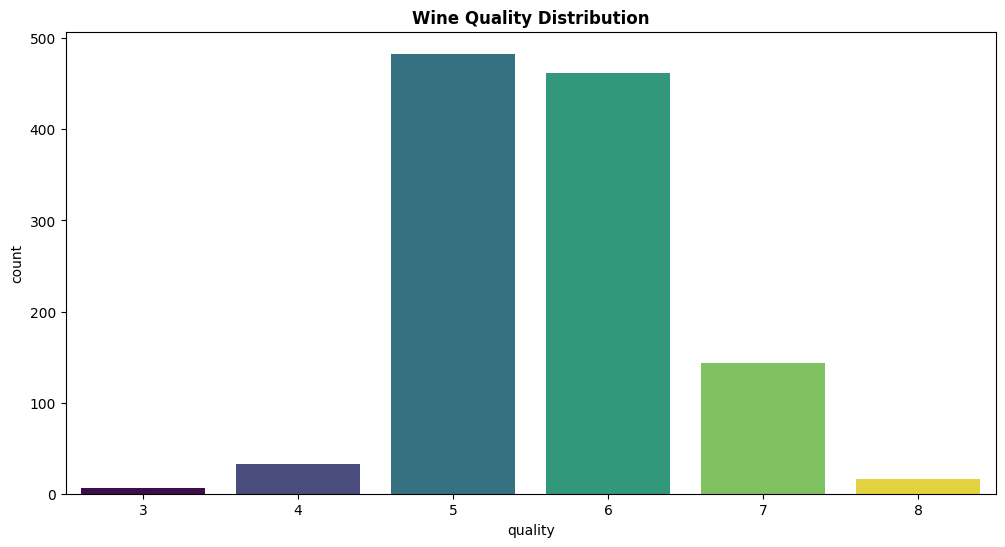

In [69]:
# WINE QUALITY DISTRIBUTION
plt.figure(figsize=(12,6))
sns.countplot(x=df['quality'],palette='viridis',hue=df['quality'],legend=False)
plt.title('Wine Quality Distribution',fontweight='bold')
plt.show()

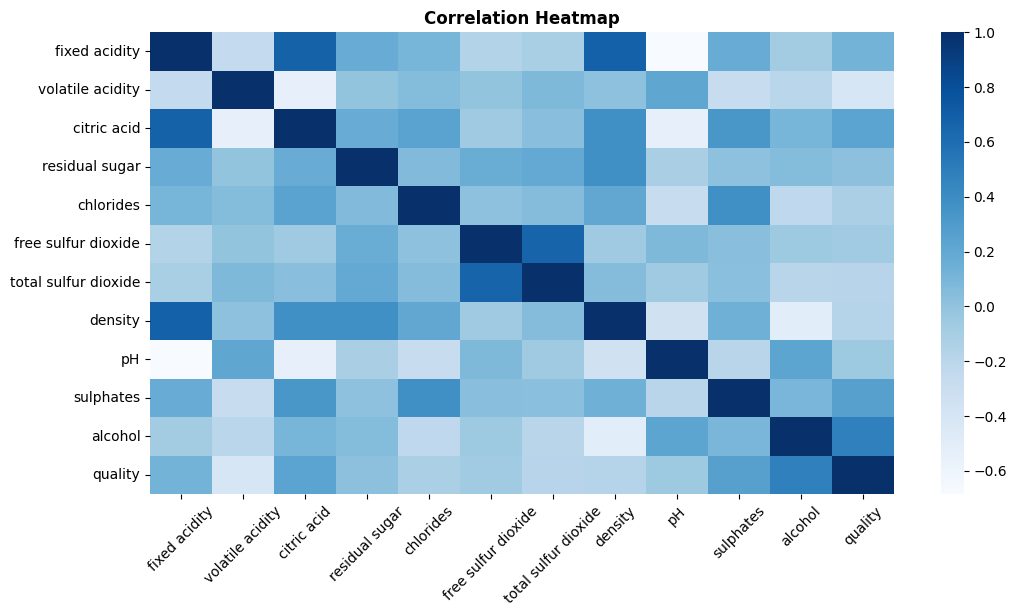

In [70]:
# CORRELATION HEAT MAP
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='Blues',annot=False)
plt.title('Correlation Heatmap',fontweight='bold')
plt.xticks(rotation=45)
plt.show()

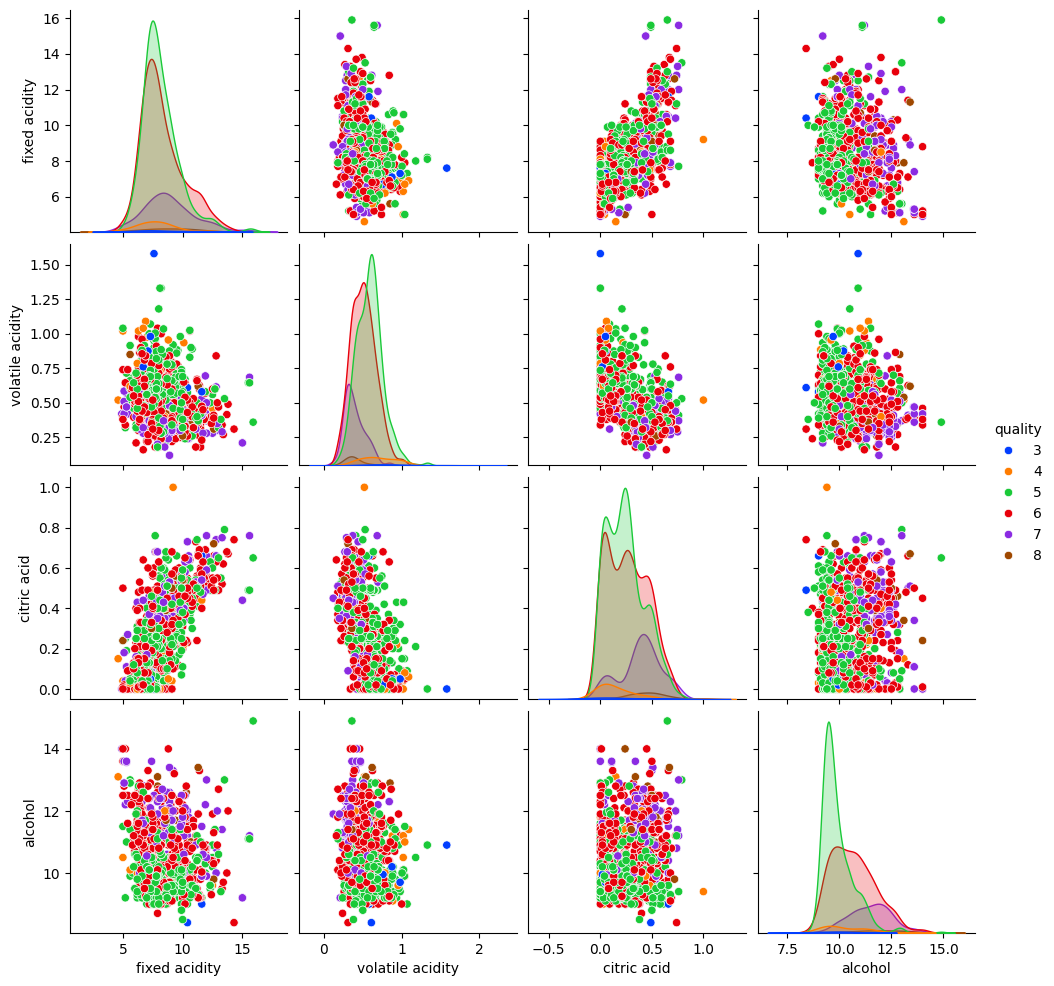

In [71]:
# plt.figure(figsize=(12,6))
sns.pairplot(
    df[['fixed acidity','volatile acidity','citric acid','alcohol','quality']],
    hue='quality',
    palette='bright'
)
plt.show()

#### Convert Quality into category

In [72]:
df['quality_labels']=df['quality'].apply(lambda x:'good' if x>=7 else 'average')
df['quality_labels'].value_counts()

quality_labels
average    984
good       159
Name: count, dtype: int64

#### Prepare Features and Targets

In [73]:
x=df.drop(['quality','quality_labels'],axis=1)
y=df['quality_labels']

#### Train_Test_Split

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#### Feature Scaling

In [75]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

#### Model Training and Evaluation

Random Forest Accuracy: 0.9301310043668122
              precision    recall  f1-score   support

     average       0.95      0.97      0.96       201
        good       0.75      0.64      0.69        28

    accuracy                           0.93       229
   macro avg       0.85      0.81      0.83       229
weighted avg       0.93      0.93      0.93       229



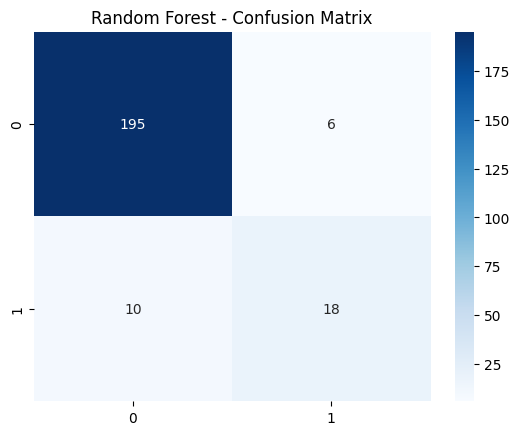

In [76]:
# Model1: RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

rf_pred=rf.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d", cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.show()

SGD Accuracy: 0.8777292576419214
              precision    recall  f1-score   support

     average       0.92      0.94      0.93       201
        good       0.50      0.43      0.46        28

    accuracy                           0.88       229
   macro avg       0.71      0.68      0.70       229
weighted avg       0.87      0.88      0.87       229



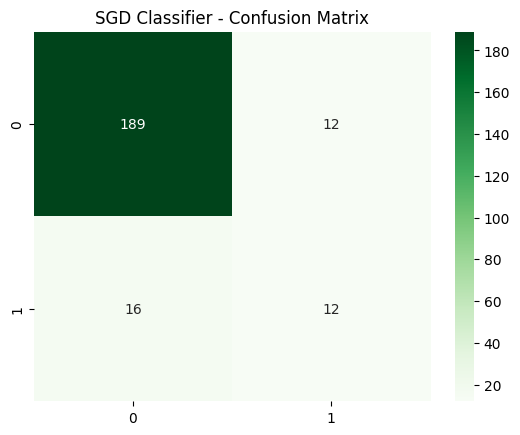

In [77]:
# Stochastic Gradient Dsecent Classifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)

sgd_pred = sgd.predict(x_test)

print("SGD Accuracy:", accuracy_score(y_test, sgd_pred))
print(classification_report(y_test, sgd_pred))

sns.heatmap(confusion_matrix(y_test, sgd_pred), annot=True, fmt="d", cmap='Greens')
plt.title("SGD Classifier - Confusion Matrix")
plt.show()

SVC Accuracy: 0.8908296943231441
              precision    recall  f1-score   support

     average       0.91      0.98      0.94       201
        good       0.62      0.29      0.39        28

    accuracy                           0.89       229
   macro avg       0.76      0.63      0.67       229
weighted avg       0.87      0.89      0.87       229



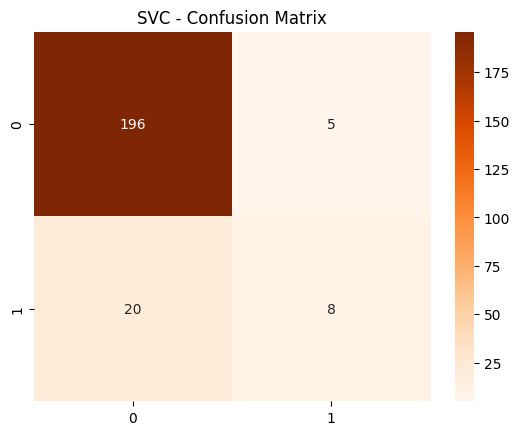

In [78]:
# Support Vector Classifier
svc = SVC()
svc.fit(x_train, y_train)

svc_pred = svc.predict(x_test)

print("SVC Accuracy:", accuracy_score(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

sns.heatmap(confusion_matrix(y_test, svc_pred), annot=True, fmt="d", cmap='Oranges')
plt.title("SVC - Confusion Matrix")
plt.show()


#### Model Comparison Table

In [79]:
models = {
    "Random Forest": accuracy_score(y_test, rf_pred),
    "SGD Classifier": accuracy_score(y_test, sgd_pred),
    "SVC": accuracy_score(y_test, svc_pred)
}

comparison_df = pd.DataFrame(models.items(), columns=["Model", "Accuracy"])
comparison_df

,Model,Accuracy
0,Random Forest,0.930131
1,SGD Classifier,0.877729
2,SVC,0.890830


#### Conclusion

In [81]:
best_model = max(models, key=models.get)
print("Best Performing Model:", best_model)

print("""
Future Improvements:
- Hyperparameter tuning (GridSearchCV)
- Feature engineering
- Removing multicollinearity
- Trying Gradient Boosting or XGBoost
- Handling class imbalance
""")

Best Performing Model: Random Forest

Future Improvements:
- Hyperparameter tuning (GridSearchCV)
- Feature engineering
- Removing multicollinearity
- Trying Gradient Boosting or XGBoost
- Handling class imbalance



In [83]:
df.to_csv("WineQuality.csv")